# A cloth manufacturing company is interested to know about the segment or attributes causes high sale

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')

In [63]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [64]:
df1=df.copy()

In [65]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [66]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [67]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [68]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

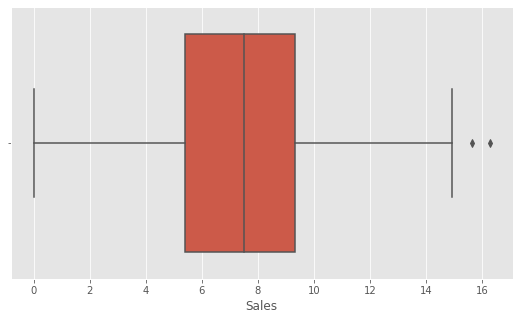

In [69]:
sns.boxplot(df1['Sales'])

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

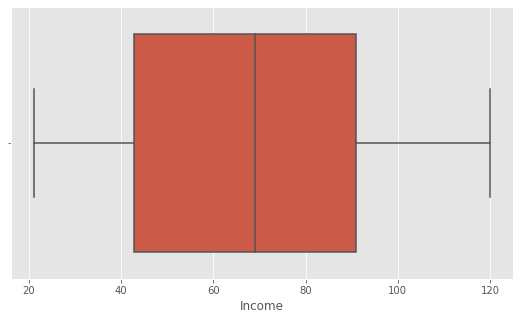

In [70]:
sns.boxplot(df1['Income'])

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education'>

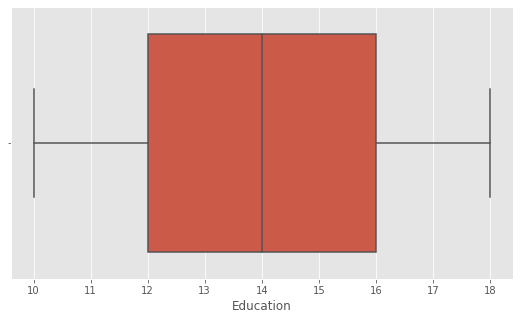

In [71]:
sns.boxplot(df1['Education'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

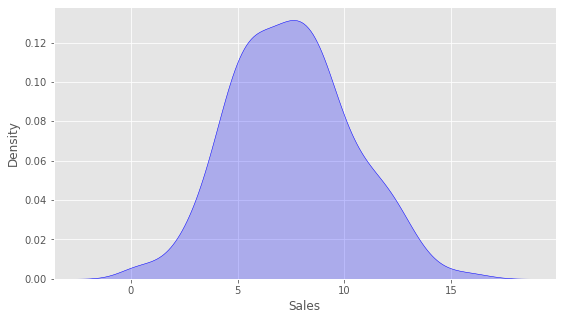

In [72]:
sns.kdeplot(df['Sales'],fill=True,color='b')

In [73]:
skew=df['Sales'].skew()
kurt=df['Sales'].kurt()

In [74]:
print('skewness=',skew)
print('kurtosis=',kurt)

skewness= 0.18556036318721578
kurtosis= -0.08087736743346197


## The data is skewed on the right and has negative kurtosis

In [75]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

In [76]:
obj_colum

['ShelveLoc', 'Urban', 'US']

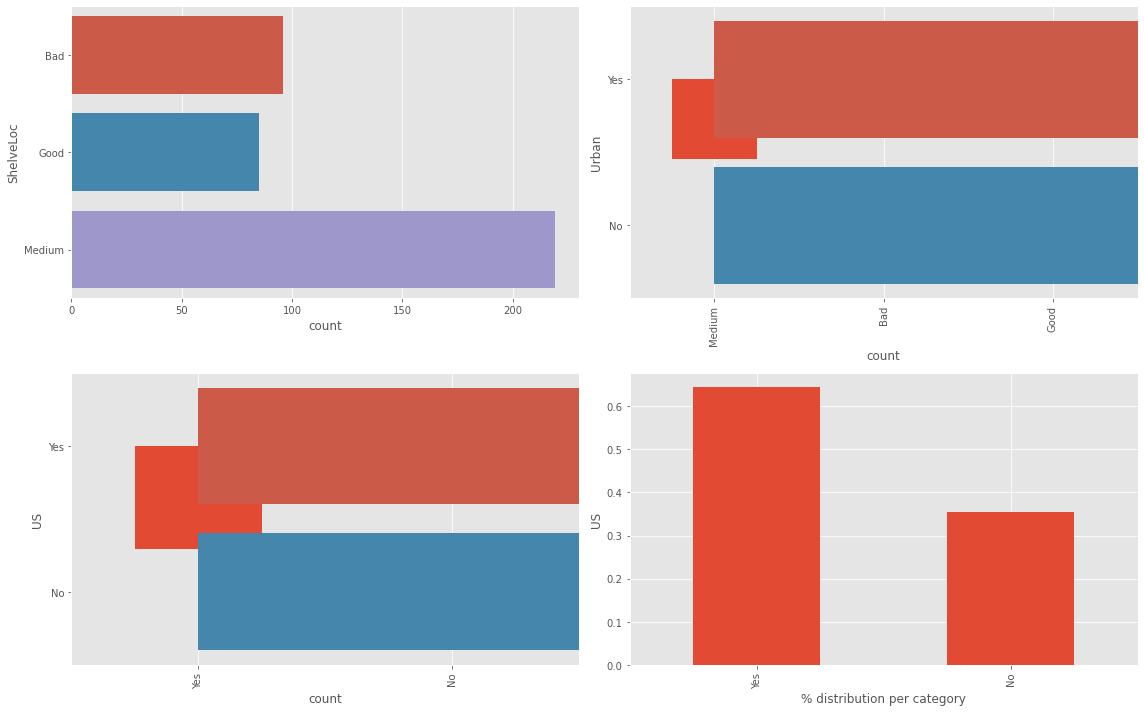

In [77]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [79]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

In [80]:
num_columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

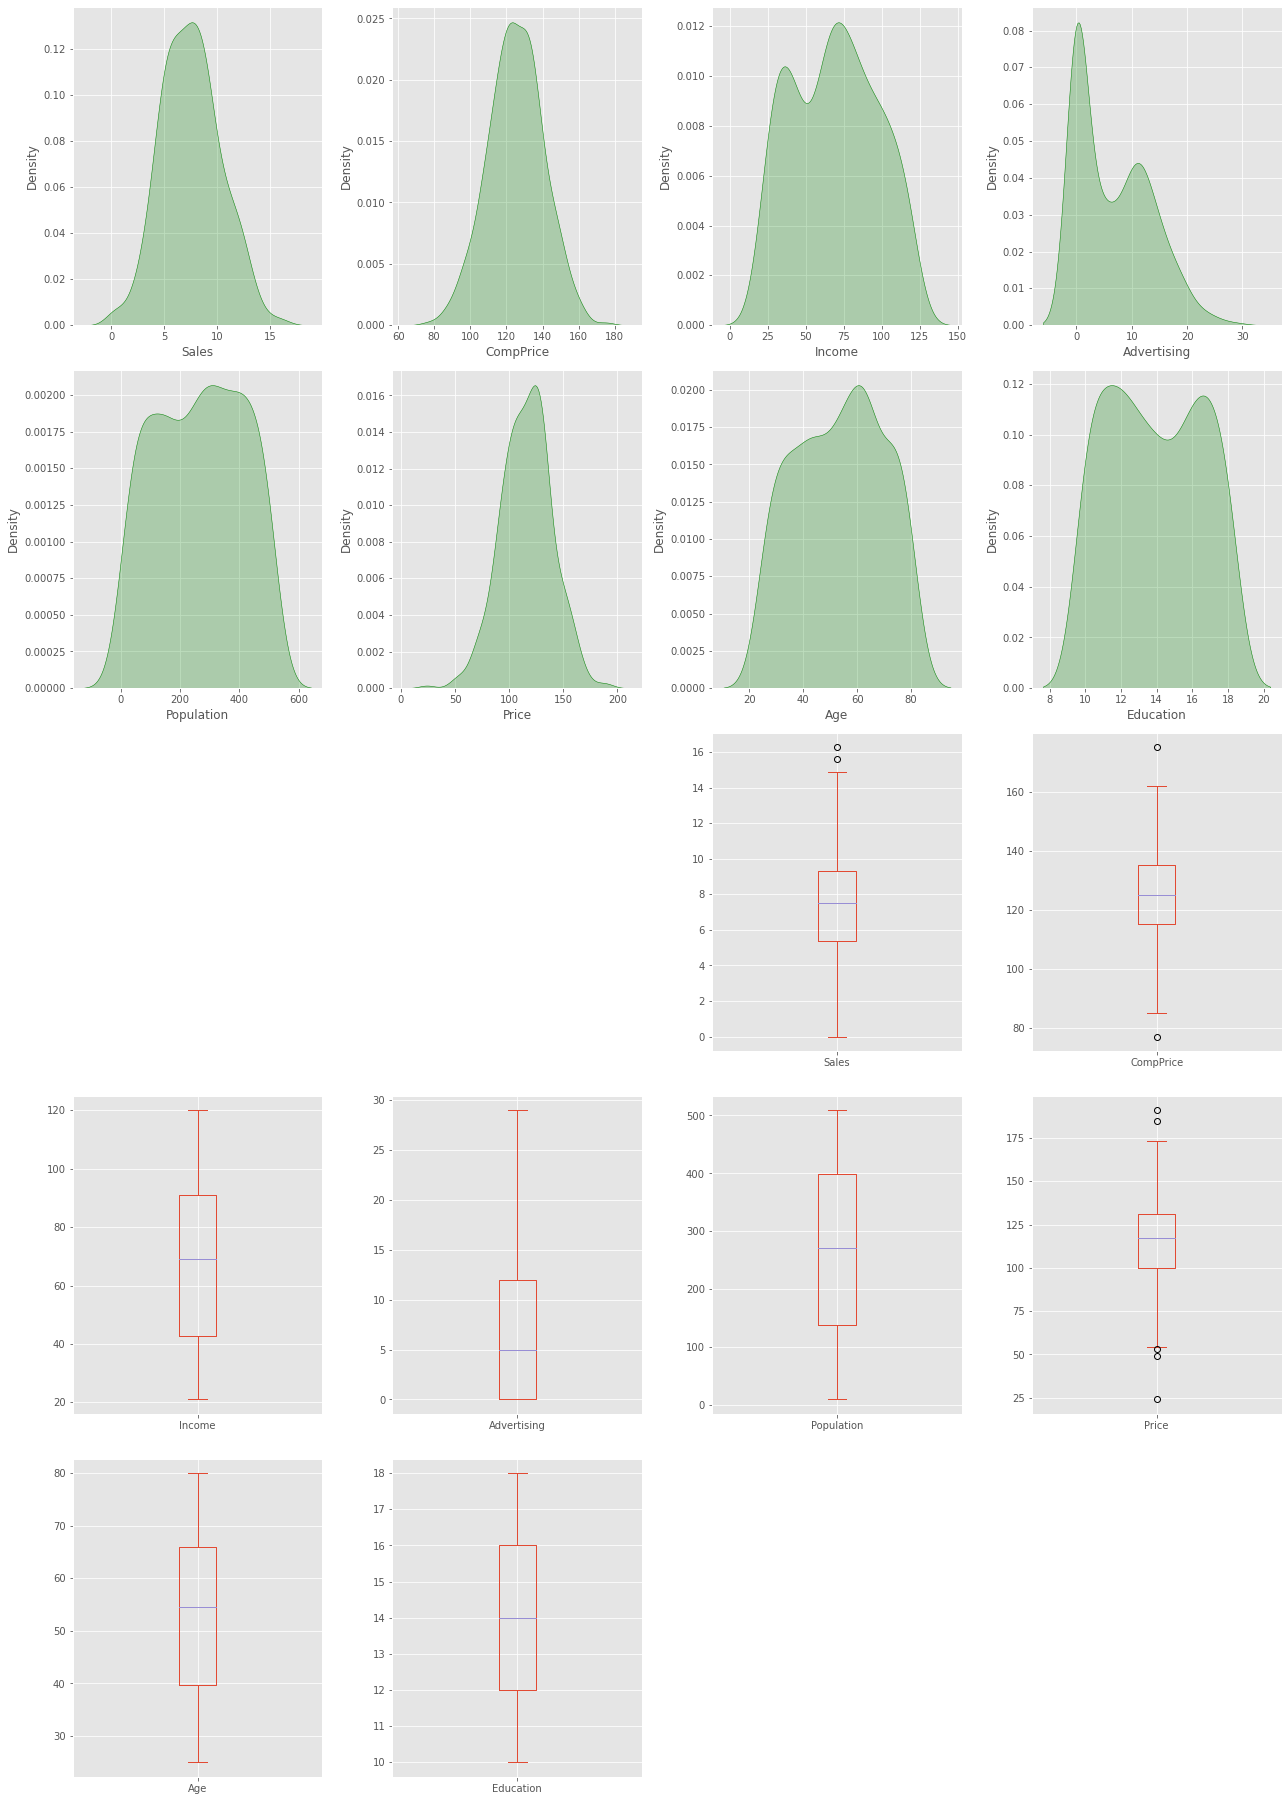

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [82]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [84]:
corel=df1.corr()

In [85]:
corel


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [86]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [87]:
corel=df1.corr()

In [88]:
corel

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


<AxesSubplot:>

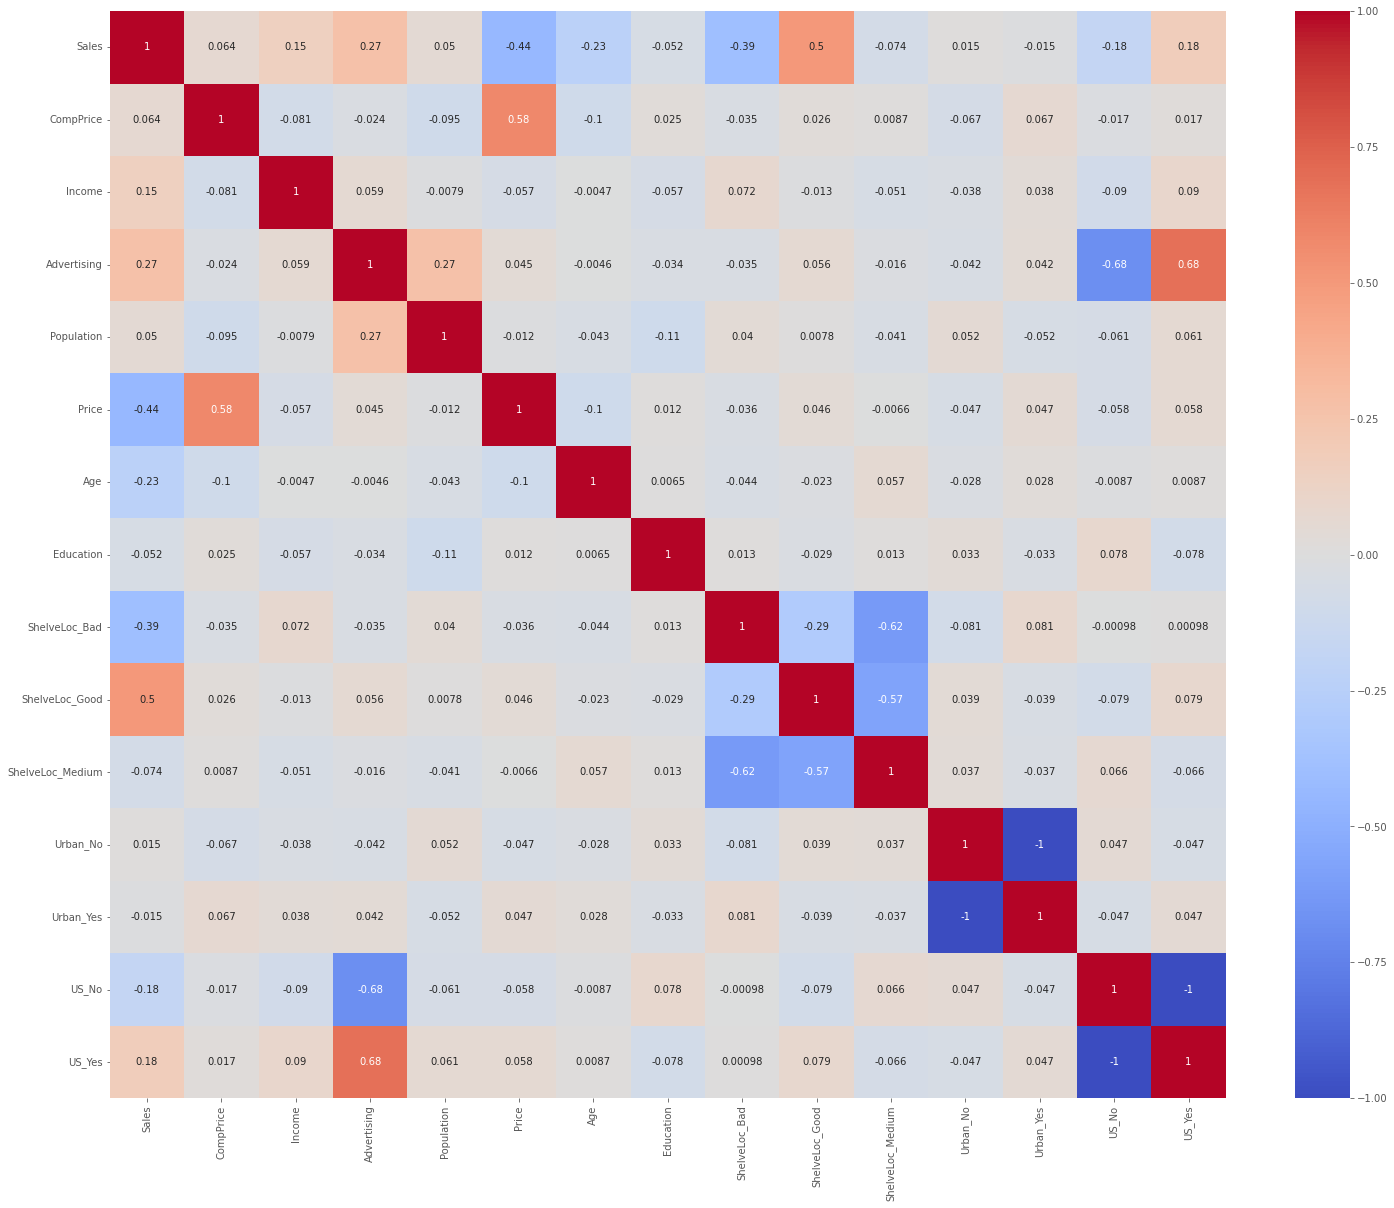

In [89]:
plt.figure(figsize=(25,20))
sns.heatmap(data=corel,
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

# From the above graph, There is strong correlation between                                             (price~CompPrice),(Advertising-US_yes).

In [90]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [91]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [94]:
y_train.value_counts()

small    167
large    153
Name: sales, dtype: int64

In [95]:
from sklearn.ensemble import RandomForestClassifier as rf

In [98]:
model =rf(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.79375

In [99]:
pred_train=model.predict(x_train)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_train,pred_train)

1.0

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(y_train,pred_train)

array([[153,   0],
       [  0, 167]], dtype=int64)

In [104]:
pred_test=model.predict(x_test)

In [105]:
accuracy_score(y_test,pred_test)

0.775

In [106]:
confusion_matrix(y_test,pred_test)

array([[34, 12],
       [ 6, 28]], dtype=int64)

In [107]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [108]:
df_t

,Actual,Predicted
75,large,large
198,small,small
337,large,small
1,large,large
245,large,large
...,...,...
153,small,small
83,small,small
118,large,small
188,large,small


In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [111]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
y_pred_dt=dt.predict(x_test)

In [113]:
from  sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       large       0.86      0.78      0.82        46
       small       0.74      0.82      0.78        34

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80



In [115]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

       large       1.00      1.00      1.00       153
       small       1.00      1.00      1.00       167

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



# Conclusion

# Since the accuracy of the training set is 100% , while the accuracy of the test set is 80%

# As seen in the confusion matrix of test data  62 instances are predicted correctly and 18 instances are predicted wrongly.

In [119]:
model.feature_importances_

array([0.10723045, 0.08795352, 0.09250769, 0.09367177, 0.24348394,
       0.12253252, 0.05738725, 0.04380586, 0.07801169, 0.02537393,
       0.01173692, 0.01090488, 0.0108753 , 0.01452428])

In [120]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [121]:
fi

,feature,importance
4,Price,0.243484
5,Age,0.122533
0,CompPrice,0.107230
3,Population,0.093672
2,Advertising,0.092508
1,Income,0.087954
8,ShelveLoc_Good,0.078012
6,Education,0.057387
7,ShelveLoc_Bad,0.043806
9,ShelveLoc_Medium,0.025374


# As seen in the above table Price is most important feature